<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Проверьте-модель-без-учета-балнаса" data-toc-modified-id="Проверьте-модель-без-учета-балнаса-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверьте модель без учета балнаса</a></span><ul class="toc-item"><li><span><a href="#Обучение-с-помощью-модели-Случайный-лес" data-toc-modified-id="Обучение-с-помощью-модели-Случайный-лес-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Обучение с помощью модели Случайный лес</a></span></li></ul></li><li><span><a href="#Обучение-с-помощью-модели-Логистической-регрессии" data-toc-modified-id="Обучение-с-помощью-модели-Логистической-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение с помощью модели Логистической регрессии</a></span></li><li><span><a href="#Обучение-с-помощью-модели-Дерево-решения" data-toc-modified-id="Обучение-с-помощью-модели-Дерево-решения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение с помощью модели Дерево решения</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [120]:
import pandas as pd # импортируем пандас 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics  import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [121]:
data=pd.read_csv('/datasets/Churn.csv') # читаем файл 

In [122]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [123]:
data.shape

(10000, 14)

In [124]:
data.head(17)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [125]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [126]:
data.columns = data.columns.str.lower()#методом str.lower() делаем из однострочными 

In [127]:
data.duplicated().sum() # дубликатов нету

0

In [128]:
print(data.dtypes)

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object


In [129]:
data_full = data.copy()

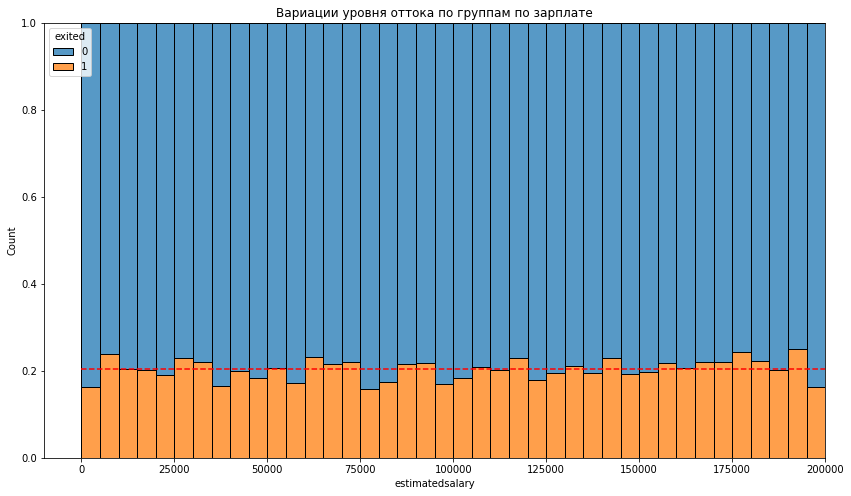

In [130]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(14,8))
sns.histplot(data=data_full,x="estimatedsalary",hue="exited",common_norm=False,multiple="fill",binwidth=5e3)\
   .set(title="Вариации уровня оттока по группам по зарплате")
plt.hlines(data_full.exited.mean(),1,200000, colors='r', linestyles='--');

In [131]:
data=data.drop('surname',axis=1)
data=data.drop('rownumber',axis=1) 
data=data.drop('estimatedsalary',axis=1)
data= data.drop('customerid',axis=1)

In [132]:
data_median=data['tenure'].median()
data['tenure']=data['tenure'].fillna(data_median) # место пропусков ставим 0 .

<AxesSubplot:>

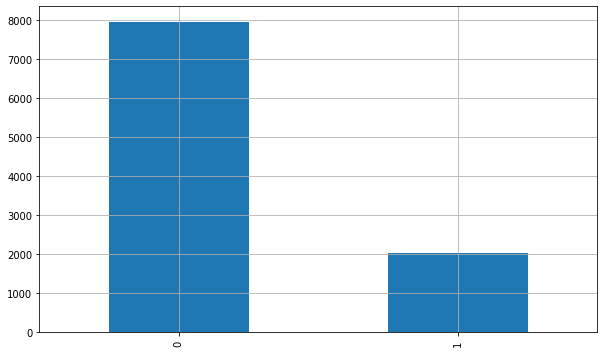

In [133]:
data['exited'].value_counts().plot(kind='bar',grid=True,figsize=(10,6)) # факт ухода клиента

соотношение ухода 2 к 8 это обозначает что к данным дисбаланс

<AxesSubplot:xlabel='age'>

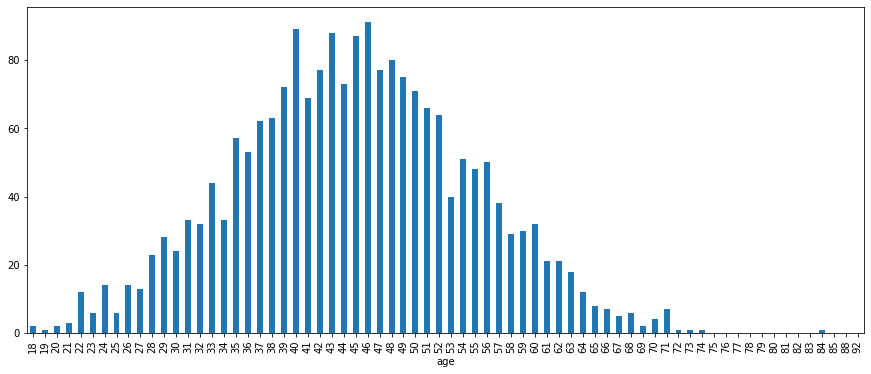

In [134]:
data.groupby('age')['exited'].sum().plot(figsize=(15,6),kind='bar') # соотношение ухода и возраста 

оток людей начинается от 40 до 48 лет 

<AxesSubplot:xlabel='geography'>

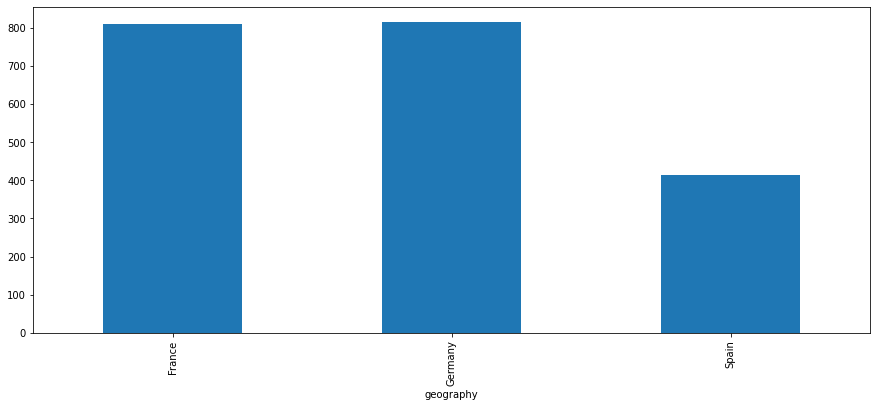

In [135]:
data.groupby('geography')['exited'].sum().plot(figsize=(15,6),kind='bar') # соотношение ухода страной проживания

лидриует Франция и Германие .

<AxesSubplot:xlabel='exited'>

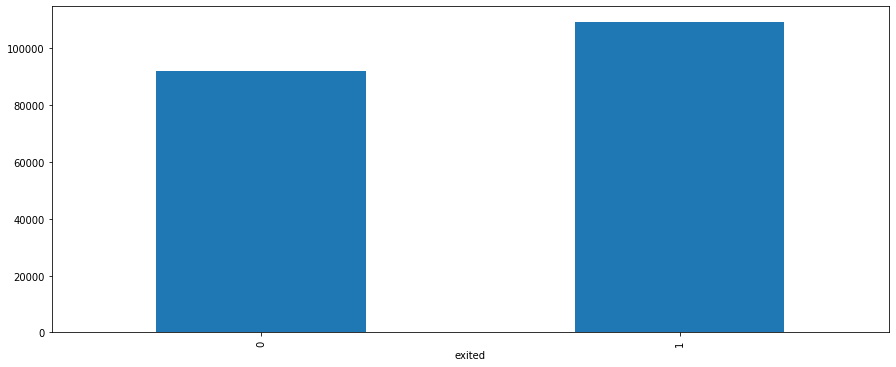

In [136]:
data.groupby('exited')['balance'].median().plot(figsize=(15,6),kind='bar') # Гистограмма  баланса денег у тех кто ушел и тех кто остался

На гистограмме видно, что зависимость ,среднее значение баланса немного выше у тех кто ушел

<AxesSubplot:xlabel='tenure'>

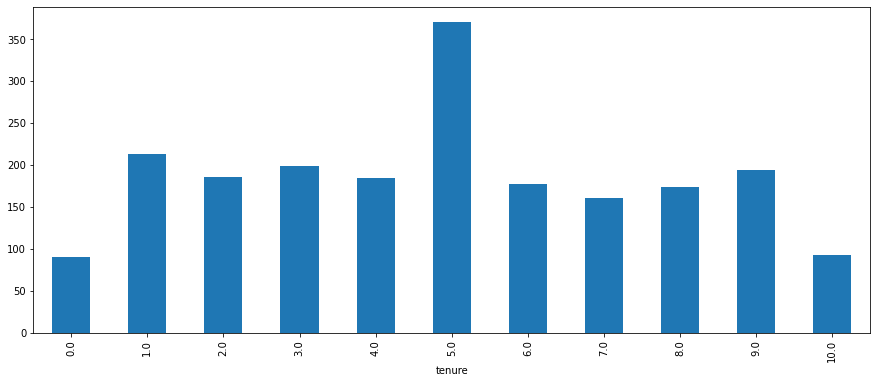

In [137]:
data.groupby('tenure')['exited'].sum().plot(figsize=(15,6),kind='bar') #сколько времени продержался человек в банке 

видем из гистограмы что люди уходили чере 1 год и через 9 лет 

In [138]:
data_ohe = pd.get_dummies(data,drop_first=True) #Примените прямое кодирование ко всему датафрейму
data_ohe.columns=data_ohe.columns.str.lower()
print(data_ohe.head(3)) 
# Таблица стало шире .Для некоторый признаоков появились новые столбцы 

   creditscore  age  tenure    balance  numofproducts  hascrcard  \
0          619   42     2.0       0.00              1          1   
1          608   41     1.0   83807.86              1          0   
2          502   42     8.0  159660.80              3          1   

   isactivemember  exited  geography_germany  geography_spain  gender_male  
0               1       1                  0                0            0  
1               1       0                  0                1            0  
2               0       1                  0                0            0  


0    0.7963
1    0.2037
Name: exited, dtype: float64
0.7963


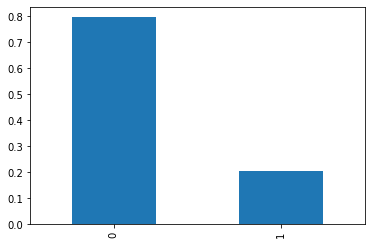

In [139]:
# Проверка адекватности модели
class_frequency=data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

target = data['exited']
features = data.drop('exited', axis=1)

target_pred_constant = pd.Series([0] * len(target))

print(accuracy_score(target, target_pred_constant)) 

In [140]:
data_train, data_valid_test=train_test_split(data_ohe,train_size=0.6,test_size=0.2,random_state=1234)
data_valid,data_test=train_test_split(data_valid_test,test_size=0.2,random_state=1234)

In [141]:
#обучаюший 
train_features=data_train.drop(['exited'],axis=1)
train_target=data_train['exited']
#валидационная
valid_features=data_valid.drop(['exited'],axis=1) # Признаки 
valid_target=data_valid['exited'] # целевой признак
#тестовая
features_test=data_valid.drop(['exited'],axis=1) # Признаки 
target_test=data_valid['exited'] # целевой признак

In [142]:
numeric = ['creditscore', 'age','tenure','balance','numofproducts','hascrcard','isactivemember','geography_germany','geography_spain','gender_male']
scaler = StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric] = scaler.transform(train_features[numeric])
valid_features[numeric]= scaler.transform(valid_features[numeric])
print(train_features.shape)
print(valid_features.shape)

(6000, 10)
(1600, 10)


## Борьба с дисбалансом

### Проверьте модель без учета балнаса

#### Обучение с помощью модели Случайный лес

In [86]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(1,50,12):
    for depth in range (1, 11,):
        model_puk = RandomForestClassifier( random_state=12345, n_estimators=est ,max_depth=depth)
        model_puk.fit(train_features,train_target) # обучите модель на тренировочной выборке
        prediction_puk=model_puk.predict(valid_features)
        f_one=f1_score(valid_target,prediction_puk)
        if result < best_result:
            best_model = model_puk
            f_one_result = f_one
            best_est = est
            best_depth = depth
            
probabilities_model_puk= model_puk.predict_proba(valid_features)
probabilities_one_model_puk = probabilities_model_puk[:, 1]
auc_roc=roc_auc_score(valid_target,probabilities_one_model_puk)            
print("F1:",f_one_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth,'AUC_ROC:',auc_roc)

NameError: name 'f_one_result' is not defined

### Обучение с помощью модели Логистической регрессии

In [59]:
model_logistic_Reg=LogisticRegression() # присваиваем модели имя
model_logistic_Reg.fit(train_features,train_target) # обучаем
predict_LogisticReg=model_logistic_Reg.predict(valid_features) # проверяем
f_lom=f1_score(predict_LogisticReg,valid_target)
probabilities_logistic_Reg = model_logistic_Reg.predict_proba(valid_features)
probabilities_one_logistic_Reg = probabilities_logistic_Reg[:, 1]
auc_roc_model_logistic_Reg=roc_auc_score(valid_target,probabilities_one_logistic_Reg)
print('F1:',f_lom,'auc_roc:',auc_roc_model_logistic_Reg)


F1: 0.13471502590673576 auc_roc: 0.6871632949065702


In [60]:
pd.Series(model_logistic_Reg.coef_[0],index=train_features.columns).sort_values()

tenure              -0.090911
isactivemember      -0.071113
gender_male         -0.043633
numofproducts       -0.037396
hascrcard           -0.017121
geography_spain     -0.015776
creditscore         -0.004454
balance              0.000003
geography_germany    0.032421
age                  0.046168
dtype: float64

### Обучение с помощью модели Дерево решения

In [62]:
for depth in range(1,10,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(train_features,train_target)
    prediction_tree=model_tree.predict(valid_features)
    f_tvo=f1_score(valid_target,prediction_tree) 
    
probabilities_valid_tree = model_tree.predict_proba(valid_features)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

print('F1:',f_tvo,"Максимальная глубина:",depth, 'auc_roc:',auc_roc_tree)

F1: 0.5422535211267606 Максимальная глубина: 9 auc_roc: 0.7743051631253768


Общий вывод дисбаланного модела:лучшим из Случайного леса получился ("случайный лес ,F1=0.585 ,auc_roc=0.832")
                               ,а Дерево решения получился("max_depth=7, при котором F1=0,576 ,auc_roc=0.776")
                               и Логистической регрессии получился("0.134")

### Увеличение выборки

In [28]:
def upsampling (features,target,repeat): #Разделяем выборку по значениям целевой функции
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]#Увеличиваем и соединяем обратно
    features_null=features[target==0]
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=1234)# Перемешиваем
    return upsampling_features,upsampling_target
features_balance_up,target_balance_up = upsampling(train_features,train_target,4)
print(features_balance_up.shape)
print(target_balance_up.shape)


(9657, 10)
(9657,)


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Посмотри, что получилось в итоге, насколько сильно выправился дисбаланс классов целевой переменной.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Пожалуйста, выведи баланс классов в <tt>upsampling_target</tt>
</div>

In [29]:
# +

<div class="alert alert-success"><b>Комментарий ревьюера 3&nbsp;<big>✔️</big></b></div>

Логистической регрессии

In [30]:
model_upsampling=LogisticRegression(class_weight='balanced',random_state=1234,solver='liblinear') # присваиваем модели имя
model_upsampling.fit(features_balance_up,target_balance_up) # обучаем
predicted_valid=model_upsampling.predict( valid_features)
print("F1:", f1_score(valid_target, predicted_valid))

probabilities_valid_upsampling = model_upsampling.predict_proba(valid_features)
probabilities_one_valid_upsampling = probabilities_valid_upsampling[:, 1]

auc_roc_upsampling=roc_auc_score(valid_target,probabilities_one_valid_upsampling)

print('auc_roc:',auc_roc_upsampling)

F1: 0.466
auc_roc: 0.7226868595539481


Вывод:Логистической регрессии "F1: 0.466,auc_roc: 0.722"

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Попробуй, пожалуйста, также модель случайного леса.
</div>

Случайный лес

In [31]:
model_forest_new=RandomForestClassifier(class_weight='balanced',random_state=1234) # присваиваем модели имя
model_forest_new.fit(features_balance_up,target_balance_up) # обучаем
prediction_forest_new=model_forest_new.predict(valid_features)
print("F1:",f1_score(valid_target,prediction_forest_new))

probabilities_forest_new = model_upsampling.predict_proba(valid_features)
probabilities_one_valid_forest_new = probabilities_forest_new[:, 1]

auc_roc_forest_newc=roc_auc_score(valid_target,probabilities_one_valid_forest_new)

print('auc_roc:',auc_roc_forest_newc)

F1: 0.5880503144654088
auc_roc: 0.7226868595539481


<div class="alert alert-danger"><b>Комментарий ревьюера 5</b>&nbsp;🔧<br>
Тут нужен перебор гиперпараметров тоже, как ниже. Иначе мы на 0.59 так и не выйдем.
</div>

Вывод:Случайный лес "F1: 0.588,auc_roc: 0.722"

Дерево решения

In [32]:
model_tree_new=DecisionTreeClassifier(class_weight='balanced',random_state=1234,max_depth=5)
model_tree_new.fit(features_balance_up,target_balance_up)
prediction_tree_new=model_tree_new.predict(valid_features)
print("F1:",f1_score(valid_target,prediction_tree_new))

probabilities_tree_new = model_upsampling.predict_proba(valid_features)
probabilities_one_valid_tree_new = probabilities_tree_new[:, 1]

auc_roc_tree_new=roc_auc_score(valid_target,probabilities_one_valid_tree_new)

print('auc_roc:',auc_roc_tree_new)

F1: 0.5642201834862385
auc_roc: 0.7226868595539481


Вывод:качество модели "Дерево решения" ,"F1=0.564,auc_roc: 0.722"

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b> супер</div>

### Уменьшение выборки

In [33]:
def downsampling(features,target,fraction):
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    downsampling_features=pd.concat([features_null.sample(frac=fraction,random_state=12345)]+[features_one])
    downsampling_target=pd.concat([target_null.sample(frac=fraction,random_state=12345)]+[target_one])
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=12345)
    return downsampling_features,downsampling_target
features_balance_up,target_balance_up =downsampling(train_features,train_target,0.3) #fraction, равным 0.3 
print(features_balance_up.shape)
print(target_balance_up.shape)

(2653, 10)
(2653,)


In [34]:
target_balance_up.value_counts(normalize = 1)

0    0.54052
1    0.45948
Name: exited, dtype: float64

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Посмотри тут, сколько представителей каждого класса в <tt>target_downsampled</tt> получилось.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 3</b>&nbsp;🔧<br>
Доведи соотношение классов до 1:1
    
У тебя в функции поставлено 0.4, это больше, чем нужно. Исправь функцию, чтобы она использовала параметр fraction, а затем подбери его значение.
</div>

Логистической регрессии

In [35]:
model_Ln=LogisticRegression(class_weight='balanced',random_state=1234,solver='liblinear') # присваиваем модели имя
model_Ln.fit(features_balance_up,target_balance_up) # обучаем
predicted_valid=model_Ln.predict( valid_features)

print("F1:", f1_score(valid_target, predicted_valid))
probabilities_valid_Ln = model_Ln.predict_proba(valid_features)
probabilities_one_valid_Ln = probabilities_valid_Ln[:, 1]

auc_roc_Ln=roc_auc_score(valid_target,probabilities_one_valid_Ln)

print('auc_roc:',auc_roc_Ln)

F1: 0.4606181455633101
auc_roc: 0.7114766990657022


<div class="alert alert-danger"><b>Комментарий ревьюера 5</b>&nbsp;🔧<br>
Ты тут изучаешь уменьшение выборки, а параметр у тебя называется <tt>features_balance_up</tt>. Потом если тебе для теста надо будет модель обучать, ты можешь перепутать оверсемплированные и сабсемплированные данные.
</div>

Вывод:Логистической регрессии "F1: 0.458,auc_roc: 0.712"

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Попробуй, пожалуйста, также модель случайного леса.
</div>

Случайный лес

In [36]:
model_forest_downsampling=RandomForestClassifier(class_weight='balanced',random_state=1234) # присваиваем модели имя
model_forest_downsampling.fit(features_balance_up,target_balance_up) # обучаем
prediction_forest_downsampling=model_forest_new.predict(valid_features)
print("F1:",f1_score(valid_target,prediction_forest_downsampling))

probabilities_forest_downsampling = model_upsampling.predict_proba(valid_features)
probabilities_one_valid_forest_downsampling = probabilities_forest_downsampling[:, 1]

auc_roc_downsampling=roc_auc_score(valid_target,probabilities_one_valid_forest_downsampling)

print('auc_roc:',auc_roc_downsampling)

F1: 0.5880503144654088
auc_roc: 0.7226868595539481


Вывод:Случайный лес "F1: 0.588,auc_roc: 0.722"

In [37]:
model_tree_downsampling=DecisionTreeClassifier(class_weight='balanced',random_state=1234,max_depth=5)
model_tree_downsampling.fit(features_balance_up,target_balance_up)
prediction_tree_downsampling=model_tree_downsampling.predict(valid_features)
print("F1:",f1_score(valid_target,prediction_tree_downsampling))

probabilities_tree_downsampling =model_tree_downsampling.predict_proba(valid_features)
probabilities_one_valid_tree_downsampling = probabilities_tree_downsampling[:, 1]

auc_roc_tree_downsampling=roc_auc_score(valid_target,probabilities_one_valid_tree_downsampling)

print('auc_roc:',auc_roc_tree_downsampling)

F1: 0.5494276795005203
auc_roc: 0.8358303665611815


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Какая у нас мера AUC-ROC тут? Укажи, пожалуйста, по меньшей мере для лучшей модели.
</div>

# 4. Тестирование модели

In [38]:
test_estim=0
test_depth=0
test_model= None
test_rez=1000
for estim in range(1,51,1):
    for depth in range(1,21,11):
        model_forest=RandomForestClassifier(class_weight='balanced',max_depth=11,n_estimators=estim,random_state=1234).fit(features_balance_up,target_balance_up)
        prediction=model_forest.predict(features_test)
        rez=f1_score(target_test,prediction)
        if rez < best_result:
            test_model = model_forest
            test_rez = rez
            test_estim = estim
            test_depth = depth
print('F1:',test_rez, "Количество деревьев:", test_estim, "Максимальная глубина:", test_depth)

F1: 0.5901234567901233 Количество деревьев: 50 Максимальная глубина: 12


In [39]:
for depth in range(1,50,10):
    model_tree=DecisionTreeClassifier(class_weight='balanced',max_depth=depth,random_state=12345).fit(features_balance_up,target_balance_up)
  
    prediction_on=model_tree.predict(features_test)
    f_ty=f1_score(target_test,prediction_on)
print('F1:',f_ty,"Максимальная глубина:",depth )   

F1: 0.49944506104328523 Максимальная глубина: 41


<div class="alert alert-danger"><b>Комментарий ревьюера 5</b>&nbsp;🔧<br>
Нельзя подбирать гиперпараметры на тестовых данных!
    
Ты выше подобрал на валидационных данных параметры для модели случайного леса без учёта дисбаланса:
    
    Количество деревьев: 49 Максимальная глубина: 10

Я её ниже проверил на тестовых.
    
Пожалуйста, для всех трёх моделей составь табличку с их F1 мерой на каждом этапе - без борьбы с дисбалансом и с каждым видом борьбы с дисбалансом, выбери из них одну лучшую (если ты подберёшь гиперпараметры случайного леса, то это, скорее всего, окажется он) и проверь именно её на тестовых данных. Если у каких-то моделей на валидационных данных также будут очень хорошие результаты, то их тоже можно один раз проверить на тестовых. Тестовые данные — только для финального теста!
</div>

In [40]:
### КОД РЕВЬЮЕРА 5
model_rfc_pure = RandomForestClassifier(random_state=12345, n_estimators=49 ,max_depth=10)\
                        .fit(train_features,train_target)
y_hat_test = model_rfc_pure.predict(features_test)
f1_score(target_test,y_hat_test)

0.582089552238806

<div class="alert alert-danger"><b>Комментарий ревьюера 5</b>&nbsp;🔧<br>
Без стратегий борьбы с дисбалансом мы до 0.59 желаемых не дотягиваем, а чтобы сдать эту работу, нужно дотянуть.
</div>

In [41]:
model_logistic=LogisticRegression(class_weight='balanced',solver='liblinear').fit(features_balance_up,target_balance_up)
prediction_ome=model_logistic.predict(features_test)
print('F1:',f1_score(target_test,prediction_ome))


F1: 0.4606181455633101


<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Проведи тестирование лучшей модели. Метрика F1 должна быть 0.59 или выше.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 3</b>&nbsp;🚫<br>
См. ниже в разделе.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 4</b>&nbsp;🚫<br>
Ты считаешь метрики для валидационных данных, посчитай их для тестовых.
</div>

# Дерево предсказаний

<div class="alert alert-warning"><b>Комментарий ревьюера 3</b>&nbsp;🚫<br>
Обучай на тренировочных данных. После подбора гиперпараметров можно объединить тренировочные и валидационные данные и обучить на их совокупности. Но нельзя обучать на данных для тестирования.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Посчитай метрику F1, пожалуйста.
</div>

In [42]:
# probabilities_tree=model_tree.predict_proba(valid_features)
# probabilities_one_valid_tree=probabilities_tree[:,1]
# fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)
# auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)
# auc_roc_tree

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Считаешь ты правильно. 
</div><div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Неправильно то, что ты, видимо, менял код и записывал результаты ниже. Лучше сделай цикл, который проходится по всем моделям и распечатывает результаты.
</div>

вывод:Без учета дисбаланса;качество модели "случайный лес ,F1=0.585 ,auc_roc=0.835:
    

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Ты умеешь делать датасеты из словарей. Попробуй формировать эти словари в циклах выше, тогда получатся гораздо более интересные графики. 
    
Прописывание конкретных значений — «хардкодинг» — мешает повторному использованию кода, в таком коде становится очень много мест, которые надо исправлять, легко что-то забыть и это приведёт к ошибкам в результатах работы кода.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Мы должны оценивать наши модели по метрике F1, а не по R2 (это, видимо, ошибка в подписях), но попутно должны рассчитывать AUC-ROC и сравнивать по ней, написать выводы, как они с мерой F1 меняются - сонаправленно или нет, лучшая модель по одной из мер является ли лучшей по другой.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Пожалуйста, сравни метрики F1 и AUC ROC!
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;📌<br>Чек-лист доделок:
<small>
* <b>не отбрасывать значимые фичи</b>, <s>отбросить незначимые</s>
* обосновать импутацию данных
* <s>разделить выборку так, чтобы было на чём тестировать</s>
* <s>задать структуру проекту — если какая-то модель используется, то использовать её на всех этапах (на этапе оверсэмплинга используется лишь одна модель)</s>
* <s>подбирать гиперпараметры таким способом, чтобы их можно было проверить</s>
* <s>подсчитывать вместе с F1 мерой меру AUC ROC</s>
* <s><b>каждый раз после оверсемплинга и андерсэмплинга смотреть, какой получается баланс классов</b></s>
* написать промежуточные выводы после валидации (есть очень хороший график по мере R2, стоит добавить ещё AUC ROC)
* протестировать лучшую на валидационных данных модель и получить <b>меру F1</b> больше или равной целевой
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;📌<br>
Выше зачеркнул сделанное, выделил жирным важное. Также нужно:
    
* одновременно подбирать и <tt>max_depth</tt> и <tt>n_estimators</tt>
* сравнить F1 и AUC ROC
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 3</b>&nbsp;📌<br>Чек-лист важных доделок:
    
* одновременно подбирать и <tt>max_depth</tt> и <tt>n_estimators</tt>
* <s>при уменьшении выборки доведи соотношение классов до 1:1</s>
* самое важное - перед тестированием обучай на тренировочных, а не тестовых данных
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 5</b>&nbsp;📌<br>
Тренируй на тренировочных данных, гиперпараметры подбирай на валидационных, тестируй на тестовых и у тебя всё получится!
</div>